In [194]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math
from IPython.display import Audio
from sklearn.decomposition import PCA

In [195]:
np.random.seed(0)
n_samples=500
time = np.linspace(0,8,n_samples)

sample1_data = np.sin(5*time) # Sinusoidal signal
sample2_data = signal.sawtooth(1.0 * np.pi * time) # Saw tooth signal

In [196]:
def sigmoid(y):
    g=np.divide(1,np.add(1,np.exp(-y)))
    return g

def gradient(eta, Y, W):
    Z=sigmoid(Y)
    Id=np.identity(Y.shape[0])
    grad=eta*(Id+np.dot((1-2*Z),Y.T))*W
    return grad

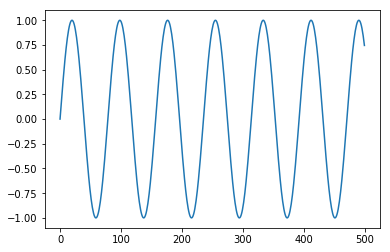

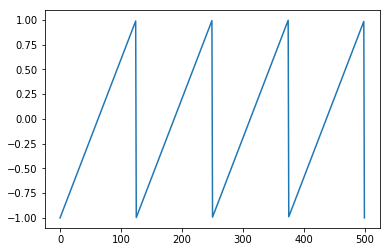

In [197]:
plt.figure()
plt.plot(sample1_data)
plt.show()
plt.figure()
plt.plot(sample2_data)
plt.show()


Correlation coefficient - original data 
[[ 1.         0.0163405]
 [ 0.0163405  1.       ]]
Mixing matrix: 
[[ 0.56804456  0.92559664]
 [ 0.07103606  0.0871293 ]]
Correlation coefficient - mixed data 
[[ 1.          0.99136365]
 [ 0.99136365  1.        ]]


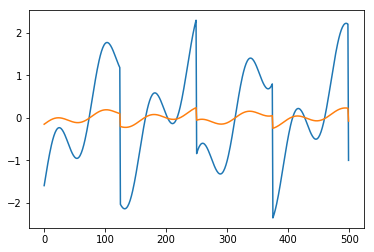

In [198]:
med1=sample1_data.std(axis=0)
s1data= sample1_data/med1
med2=sample2_data.std(axis=0)
s2data=sample2_data/med2

print("Correlation coefficient - original data \n" + str(np.corrcoef(s1data,s2data)))

orig=np.matrix([s1data,s2data])
n=len(orig)
A=np.random.random([n,n])
A=np.matrix([[ 0.56804456  ,0.92559664],
 [ 0.07103606  ,0.0871293 ]])
print("Mixing matrix: \n"+str(A))
X=np.dot(A,orig)
print("Correlation coefficient - mixed data \n" + str(np.corrcoef(X)))
plt.figure()
plt.plot(X.T)
plt.show()

In [199]:
def costFunc(Y,W):
    Z=sigmoid(Y)
    c1=np.dot(Z.T,1-Z)
    C1=np.log(c1)
    return np.sum(C1)

In [200]:
eta=0.01
eta0=eta
T=1000
corr=1
num_iter=10000
threshold=0.0000000001
cost=0
prevCost=0
flag=True
while flag==True:
    W=np.random.uniform(0.01,0.1,(n,n))
    print("Initial guessed decomposition matrix: \n"+str(W))
    cost=0
    prevCost=0
    for i in range(0,num_iter):
        Y=np.dot(W,X)
        delW=gradient(eta,Y,W)
        W+=delW
        eta=eta0/(1+(i/T))
        if i==0:
            cost=costFunc(Y,W)
        elif i%10==0:
            prevCost=cost
            cost=costFunc(Y,W)
            if abs(abs(prevCost)-abs(cost)) < threshold:
                flag=False
                #print("X"+str(i))
                break;
    Y2=np.dot(W,X)
    corr=np.corrcoef(Y2)[1][0]
    print("Correlation coefficient \n" + str(np.corrcoef(Y2)[1][0]))
    print("\n\n")

Initial guessed decomposition matrix: 
[[ 0.04812893  0.06813047]
 [ 0.04938285  0.09025957]]
Correlation coefficient 
0.00122698893186



Initial guessed decomposition matrix: 
[[ 0.09672965  0.04450974]
 [ 0.08125525  0.05760054]]
Correlation coefficient 
0.000947381820881



Initial guessed decomposition matrix: 
[[ 0.06112401  0.0933037 ]
 [ 0.01639325  0.01784164]]
Correlation coefficient 
0.00180374081075



Initial guessed decomposition matrix: 
[[ 0.01181966  0.08493579]
 [ 0.08003411  0.08830109]]
Correlation coefficient 
-0.000792489553984



Initial guessed decomposition matrix: 
[[ 0.09807565  0.08192427]
 [ 0.05153314  0.08024763]]
Correlation coefficient 
0.000238763274763



Initial guessed decomposition matrix: 
[[ 0.0206447   0.06759289]
 [ 0.0229018   0.0950202 ]]
Correlation coefficient 
0.00132016077288



Initial guessed decomposition matrix: 
[[ 0.05696635  0.04731957]
 [ 0.03381001  0.07968103]]
Correlation coefficient 
0.000537428278235



Initial guessed decomp

Correlation coefficient 
0.000889922488335



Initial guessed decomposition matrix: 
[[ 0.087747    0.02057787]
 [ 0.05656412  0.02188613]]
Correlation coefficient 
0.000515738669162



Initial guessed decomposition matrix: 
[[ 0.07451737  0.04564537]
 [ 0.06088792  0.02649519]]
Correlation coefficient 
0.00145150711561



Initial guessed decomposition matrix: 
[[ 0.0230363   0.05392507]
 [ 0.04200515  0.09463888]]
Correlation coefficient 
0.000167102831535



Initial guessed decomposition matrix: 
[[ 0.07887927  0.07737973]
 [ 0.09133478  0.01750802]]
Correlation coefficient 
0.00107170947666



Initial guessed decomposition matrix: 
[[ 0.05969732  0.06260285]
 [ 0.09657427  0.03629328]]
Correlation coefficient 
0.000515439559418





Final decomposition matrix: 
 [[-0.33505193  3.56800652]
 [ 0.28585871 -2.31062787]]
Correlation coefficient 
0.000515439559418


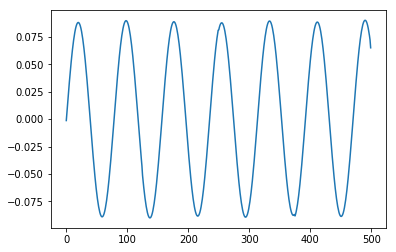

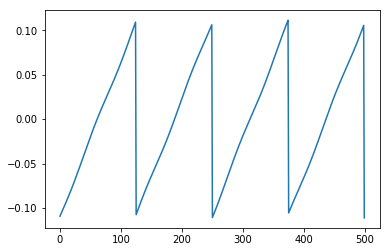

In [201]:
print('Final decomposition matrix: \n',W)
Y2=np.dot(W,X)
print("Correlation coefficient \n" + str(np.corrcoef(Y2)[1][0]))
plt.figure()
plt.plot(Y2[0].T)
plt.show()
plt.figure()
plt.plot(Y2[1].T)
plt.show()